# Met API Data Exploration

In [56]:
import os
import pandas as pd
import re
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Create DF from JSON file content

In [2]:
# Create empty DF for concatenation
df_all = None

# Get files from data folder
base_dir = "../../data/met/api"
files = os.listdir(base_dir)

# Iterate over files
for file in files:
    
    # Convert each file to DF
    df = pd.read_json(f"{base_dir}/{file}")
    
    # Add first DF to concatenation DF
    if df_all is None:
        df_all = df
    
    # Concatenate remaining DFs
    else:
        df_all = pd.concat([df_all, df], axis="rows", ignore_index=True)

In [3]:
doubles = df_all["objectID"].duplicated()
print(f"Number of objects: {len(doubles)}")
print()

i = 0

for d in doubles:
    if d == True:
        i += 1

print(f"Duplicate records: {i}")

Number of objects: 487352

Duplicate records: 4884


In [4]:
# Remove duplicates
met_df = df_all.drop_duplicates(subset=['objectID'], keep="first")

In [5]:
print(f"Number of Objects: {len(met_df)}")
print()
met_df.info()

Number of Objects: 482468

<class 'pandas.core.frame.DataFrame'>
Index: 482468 entries, 0 to 487351
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   objectID               482468 non-null  int64 
 1   isHighlight            482468 non-null  bool  
 2   accessionNumber        482468 non-null  object
 3   accessionYear          482468 non-null  object
 4   isPublicDomain         482468 non-null  bool  
 5   primaryImage           482468 non-null  object
 6   primaryImageSmall      482468 non-null  object
 7   additionalImages       482468 non-null  object
 8   constituents           281120 non-null  object
 9   department             482468 non-null  object
 10  objectName             482468 non-null  object
 11  title                  482468 non-null  object
 12  culture                482468 non-null  object
 13  period                 482468 non-null  object
 14  dynasty                482468 

In [6]:
met_df.head()

objectID  isHighlight accessionNumber accessionYear  isPublicDomain  \
0         1        False      1979.486.1          1979           False   
1         2        False      1980.264.5          1980           False   
2         3        False        67.265.9          1967           False   
3         4        False       67.265.10          1967           False   
4         5        False       67.265.11          1967           False   

  primaryImage primaryImageSmall additionalImages  \
0                                              []   
1                                              []   
2                                              []   
3                                              []   
4                                              []   

                                        constituents         department  ...  \
0  [{'constituentID': 164292, 'role': 'Maker', 'n...  The American Wing  ...   
1  [{'constituentID': 1079, 'role': 'Maker', 'nam...  The American Wing  ...   
2                                               None  The American Wing  ...   
3                                               None  The American Wing  ...   
4                                               None  The American Wing  ...   

  classification rightsAndReproduction linkResource              metadataDate  \
0                                                    2021-04-06T04:41:04.967Z   
1                                                    2021-04-06T04:41:04.967Z   
2                                                    2021-04-06T04:41:04.967Z   
3                                                    2021-04-06T04:41:04.967Z   
4                                                    2021-04-06T04:41:04.967Z   

                                 repository  \
0  Metropolitan Museum of Art, New York, NY   
1  Metropolitan Museum of Art, New York, NY   
2  Metropolitan Museum of Art, New York, NY   
3  Metropolitan Museum of Art, New York, NY   
4  Metropolitan Museum of Art, New York, NY   

                                           objectURL  tags objectWikidata_URL  \
0  https://www.metmuseum.org/art/collection/search/1  None                      
1  https://www.metmuseum.org/art/collection/search/2  None                      
2  https://www.metmuseum.org/art/collection/search/3  None                      
3  https://www.metmuseum.org/art/collection/search/4  None                      
4  https://www.metmuseum.org/art/collection/search/5  None                      

  isTimelineWork GalleryNumber  
0          False                
1          False                
2          False                
3          False                
4          False                

[5 rows x 57 columns]

In [7]:
# List all column names in met df
met_df.columns

Index(['objectID', 'isHighlight', 'accessionNumber', 'accessionYear',
       'isPublicDomain', 'primaryImage', 'primaryImageSmall',
       'additionalImages', 'constituents', 'department', 'objectName', 'title',
       'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole',
       'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix',
       'artistAlphaSort', 'artistNationality', 'artistBeginDate',
       'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL',
       'objectDate', 'objectBeginDate', 'objectEndDate', 'medium',
       'dimensions', 'measurements', 'creditLine', 'geographyType', 'city',
       'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus',
       'excavation', 'river', 'classification', 'rightsAndReproduction',
       'linkResource', 'metadataDate', 'repository', 'objectURL', 'tags',
       'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber'],
      dtype='object')

In [8]:
# Item added Oct. 5, 2023

print(met_df.iloc[481266])
print(met_df.iloc[481266]["objectURL"])

objectID                                                            904013
isHighlight                                                          False
accessionNumber                                                  56.597.11
accessionYear                                                             
isPublicDomain                                                       False
primaryImage                                                              
primaryImageSmall                                                         
additionalImages                                                        []
constituents             [{'constituentID': 72709, 'role': 'Artist', 'n...
department                                             Drawings and Prints
objectName                                                           Print
title                                             Bacchus, Venus and Ceres
culture                                                                   
period                   

In [9]:
# Item added Oct. 5, 2023

print(met_df.iloc[281266])

objectID                                                            423726
isHighlight                                                          False
accessionNumber                                           63.350.204.79.12
accessionYear                                                         1963
isPublicDomain                                                        True
primaryImage             https://images.metmuseum.org/CRDImages/dp/orig...
primaryImageSmall        https://images.metmuseum.org/CRDImages/dp/web-...
additionalImages                                                        []
constituents             [{'constituentID': 105670, 'role': 'Publisher'...
department                                             Drawings and Prints
objectName                                                           Print
title                    Life of Horace B. Claflin, from the Histories ...
culture                                                                   
period                   

## REGIONS

In [10]:
# Copy region column
met_df.loc[:, "region_cc"] = met_df.loc[:, "region"]

# Cast region copy column as strings
met_df.loc[:, "region_cc"] = met_df.loc[:, "region_cc"].astype(str)

# Set region copy values to lowercase
met_df.loc[:, "region_cc"] = met_df.loc[:, "region_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of country copy values
met_df.loc[:, "region_cc"] = met_df.loc[:, "region_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "region_cc"] = met_df.loc[:, "region_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\1565109963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "region_cc"] = met_df.loc[:, "region"]


In [11]:
# Count and list all region values 
met_regions = Counter(met_df["region_cc"]).most_common()

print(f"Unique region values: {len(met_regions)}")
print()
for key, value in met_regions:
    print(f"{key} - {value}")

Unique region values: 786

none - 443441
upper egypt, thebes - 11353
memphite region - 4652
mid-atlantic - 4445
new england - 2087
mesopotamia - 1990
iran - 1740
mesoamerica - 1276
middle egypt - 1162
northern upper egypt - 729
eastern delta - 553
midwest - 351
west midlands - 349
syria - 301
levant - 267
anatolia - 224
bactria-margiana - 221
iran or mesopotamia - 219
sumatra - 209
southern upper egypt - 202
fayum entrance area - 193
île-de-france - 189
southern - 187
ica valley - 182
fayum - 168
mid-atlantic united states - 154
central asia or iran - 152
washkuk hills - 145
new england united states - 139
borneo - 129
java - 116
iran, probably from luristan - 116
western desert; kharga oasis - 113
central côte d'ivoire - 111
north coast - 104
cyprus - 100
baffin island - 95
central asia - 94
midwest united states - 85
kashmir - 74
northern côte d'ivoire - 72
iran, luristan - 68
deccan - 67
central anatolia - 63
caucasus - 62
lower nubia - 62
bohemia - 57
northern region - 57
pyrénées-

### 10 Most Common REGIONS

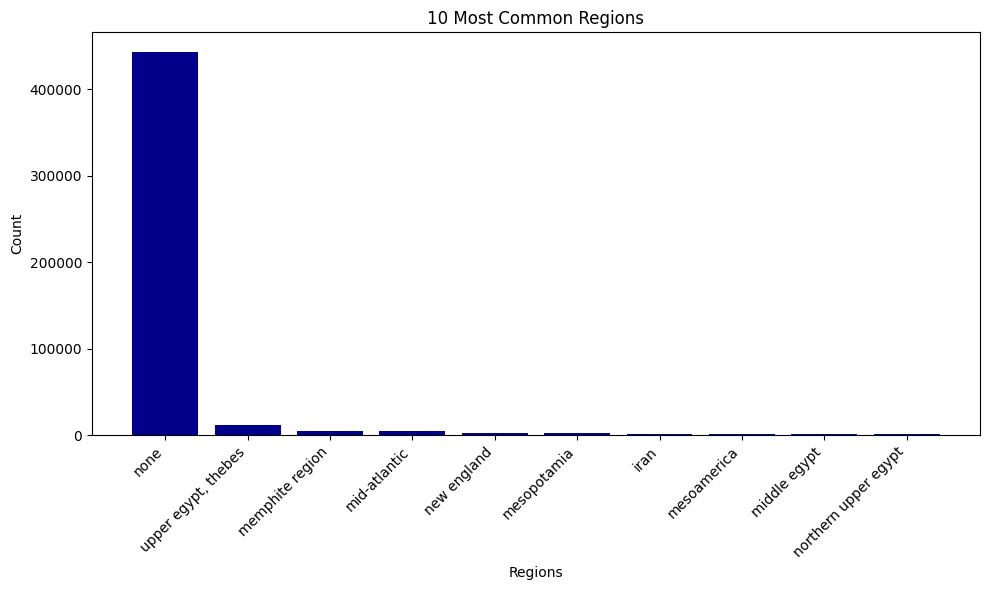

In [12]:
top_regions = list(zip(*Counter(met_df["region_cc"]).most_common(10)))
plt.figure(figsize=(10, 6))
plt.bar(top_regions[0], top_regions[1], color='darkblue')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('10 Most Common Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## CULTURES

In [13]:
# Copy culture column
met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture"]

# Cast culture copy column as strings
met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture_cc"].astype(str)

# Set culture copy values to lowercase
met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of culture copy values
met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\4221381050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "culture_cc"] = met_df.loc[:, "culture"]


In [14]:
# Count and list all culture values 
met_cultures = Counter(met_df["culture_cc"]).most_common()

print(f"Unique culture values: {len(met_cultures)}")
print()
for key, value in met_cultures:
    print(f"{key} - {value}")

Unique culture values: 5354

none - 317428
american - 28591
greek, attic - 17309
japan - 16960
china - 13513
french - 10653
japanese - 5961
roman - 4858
british - 3101
italian - 2984
cypriot - 2774
german - 2148
american or european - 2050
coptic - 1671
european - 1482
etruscan - 1234
greek - 1207
iran - 1071
sasanian - 919
spanish - 862
chinese - 854
mexican - 838
frankish - 753
indonesia (java) - 697
moche - 669
minoan - 663
indian - 637
asmat people - 618
korea - 584
european or middle eastern - 540
probably american - 521
byzantine - 491
probably french - 490
assyrian - 480
chinese, for american market - 452
india - 445
paracas - 400
thailand - 382
south netherlandish - 361
austrian - 348
babylonian - 347
peruvian - 321
tibet - 281
british (american market) - 275
greek, south italian, apulian - 274
greek, laconian - 261
turkish - 257
russian - 252
javanese - 246
belgian - 236
bactria-margiana archaeological complex - 222
chimú - 219
catalan - 213
vicús - 209
indonesia (central java

### 10 Most Common CULTURES

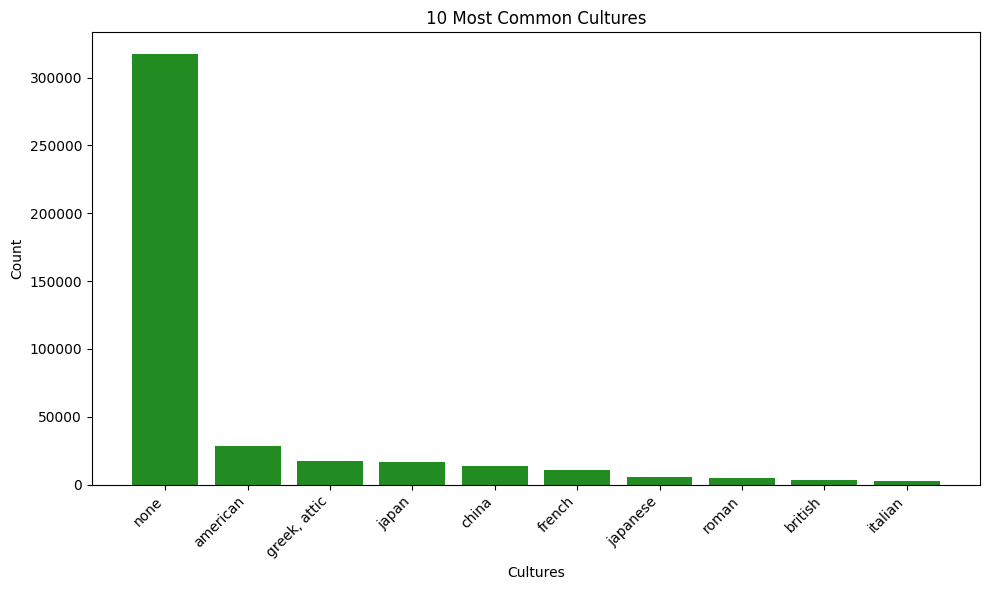

In [15]:
top_cultures = list(zip(*Counter(met_df["culture_cc"]).most_common(10)))
plt.figure(figsize=(10, 6))
plt.bar(top_cultures[0], top_cultures[1], color='forestgreen')
plt.xlabel('Cultures')
plt.ylabel('Count')
plt.title('10 Most Common Cultures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ARTIST NATIONALITIES

In [16]:
# Copy artist nationality column
met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artistNationality"]

# Cast artist nationality copy column as strings
met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artist_natl_cc"].astype(str)

# Set artist nationality copy values to lowercase
met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artist_natl_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of artist nationality copy values
met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artist_natl_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artist_natl_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\4252497696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "artist_natl_cc"] = met_df.loc[:, "artistNationality"]


In [17]:
# Count and list all artist nationality values 
met_artist_natl = Counter(met_df["artist_natl_cc"]).most_common()

print(f"Unique artist nationality values: {len(met_artist_natl)}")
print()
for key, value in met_artist_natl:
    print(f"{key} - {value}")

Unique artist nationality values: 654

none - 234697
american - 89340
french - 47337
italian - 24448
british - 24266
german - 11997
japanese - 7513
netherlandish - 5691
dutch - 4116
spanish - 2293
british, scottish - 2276
austrian - 2189
chinese - 2115
mexican - 1812
flemish - 1514
american, born germany - 1431
bohemian - 1280
swiss - 1076
american, born england - 894
russian - 772
irish - 670
iranian - 628
danish - 463
belgian - 446
american, born hungary - 445
american, born russia - 416
swedish - 345
indian - 334
american, born ireland - 331
american, born france - 318
british and american - 270
french, born russia - 267
american, born austria - 260
british, born india - 260
american, born poland - 257
american, born cuba - 223
hungarian - 221
czech - 221
american, born the netherlands - 208
french and american - 200
american, born sweden - 185
alsatian - 180
american, born czechoslovakia - 179
canadian - 175
american, born switzerland - 168
american, born scotland - 167
american, b

### 10 Most Common ARTIST NATIONALITIES

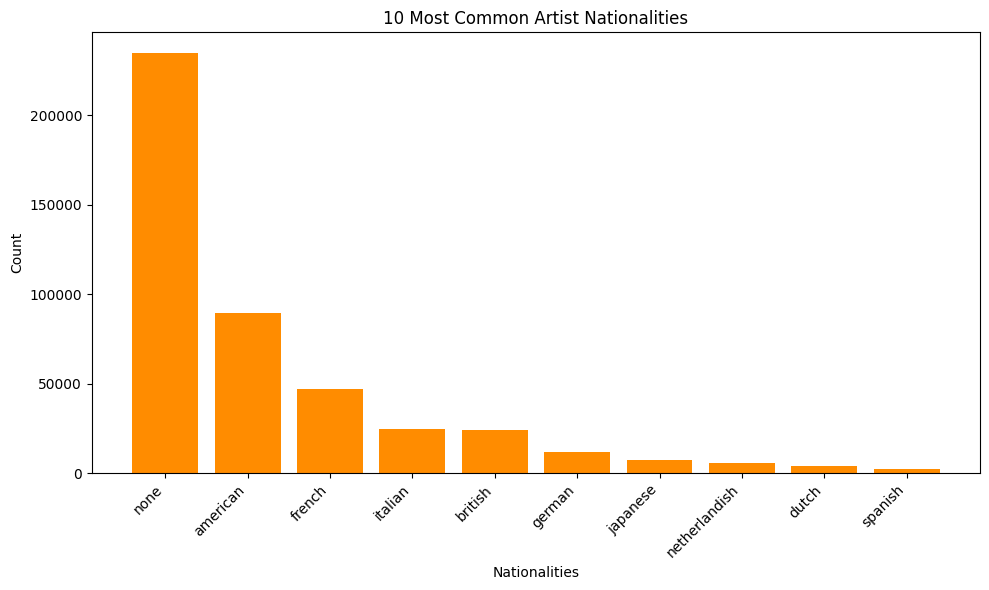

In [18]:
top_nationalities = list(zip(*Counter(met_df["artist_natl_cc"]).most_common(10)))

plt.figure(figsize=(10, 6))
plt.bar(top_nationalities[0], top_nationalities[1], color='darkorange')
plt.xlabel('Nationalities')
plt.ylabel('Count')
plt.title('10 Most Common Artist Nationalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## COUNTRIES

In [19]:
# Copy country column
met_df.loc[:, "country_cc"] = met_df.loc[:, "country"]

# Cast country copy column as strings
met_df.loc[:, "country_cc"] = met_df.loc[:, "country_cc"].astype(str)

# Set country copy values to lowercase
met_df.loc[:, "country_cc"] = met_df.loc[:, "country_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of country copy values
met_df.loc[:, "country_cc"] = met_df.loc[:, "country_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "country_cc"] = met_df.loc[:, "country_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\1155212913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "country_cc"] = met_df.loc[:, "country"]


In [20]:
# Count and list all country values
met_countries = Counter(met_df["country_cc"]).most_common()

print(f"Unique country values: {len(met_countries)}")
print()
for key, value in met_countries:
    print(f"{key} - {value}")

Unique country values: 1007

none - 382219
egypt - 30049
united states - 9589
france - 8052
iran - 6560
japan - 5532
germany - 3972
italy - 3495
peru - 3423
england - 3266
india - 2114
mexico - 1972
indonesia - 1706
byzantine egypt - 1673
china - 1199
turkey - 993
spain - 985
papua new guinea - 880
nigeria - 639
belgium - 500
democratic republic of the congo - 492
syria - 460
iraq - 430
canada - 394
mali - 378
the netherlands - 373
austria - 342
colombia - 333
côte d'ivoire - 299
russia - 283
united kingdom - 276
america - 264
morocco - 245
cameroon - 235
switzerland - 202
costa rica - 201
philippines - 195
present-day france - 178
bolivia - 165
present-day uzbekistan - 161
tibet - 159
ottoman empire - 158
ecuador - 154
egypt or syria - 152
ghana - 151
northern france - 149
netherlands - 141
saudi arabia - 127
republic of benin - 119
czech republic - 110
panama - 109
guatemala - 102
algeria - 93
burkina faso - 92
palestine - 92
nubia (sudan) - 90
australia - 84
thailand - 79
scotland -

### 10 Most Common COUNTRIES

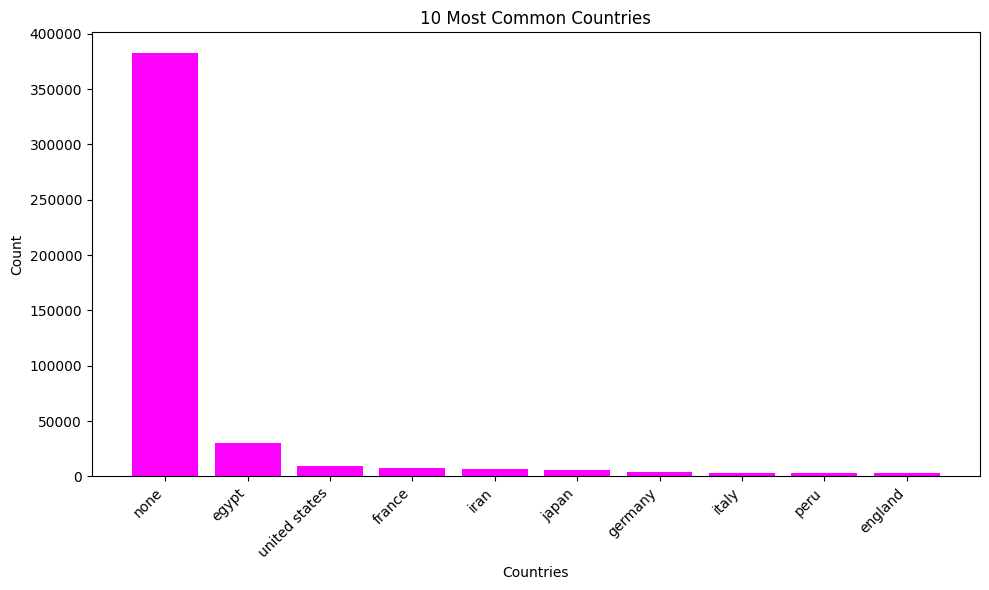

In [21]:
top_countries = list(zip(*Counter(met_df["country_cc"]).most_common(10)))

plt.figure(figsize=(10, 6))
plt.bar(top_countries[0], top_countries[1], color='magenta')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('10 Most Common Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## SUBREGIONS

In [22]:
# Copy subregion column
met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion"]

# Cast subregion copy column as strings
met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion_cc"].astype(str)

# Set subregion copy values to lowercase
met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of subregion copy values
met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\3434363471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "subregion_cc"] = met_df.loc[:, "subregion"]


In [23]:
# Count and list subregion values
met_subregions = Counter(met_df["subregion_cc"]).most_common()

print(f"Unique subregion values: {len(met_subregions)}")
print()
for key, value in met_subregions:
    print(f"{key} - {value}")

Unique subregion values: 349

none - 460543
lisht north - 3006
deir el-bahri - 3006
malqata - 2502
asasif - 1496
southern asasif - 1307
lisht south - 918
amarna (akhetaten) - 841
valley of the kings - 735
sheikh abd el-qurna - 536
qasr-i abu nasr - 531
saqqara - 480
hasanlu - 399
abydos - 395
qantir (piramesse) - 375
nimrud (ancient kalhu) - 324
ctesiphon - 237
wadi gabbanat el-qurud, wadi d - 209
nippur - 194
probably from sippar (modern tell abu habba) - 143
dra abu el-naga - 135
hierakonpolis (nekhen) - 131
oxyrhynchus (bahnasa) - 125
probably from babylon (modern hillah) - 114
probably from acemhöyük - 113
dendera - 109
medinet habu - 99
nishapur - 93
tell basta (bubastis) - 92
tell taya - 91
khokha - 91
deir el-medina - 85
memphis (mit rahina) - 85
lachish (modern tell ed-duweir) - 80
meir - 76
lahun - 75
memphite necropolis - 75
said to be from ziwiye - 71
faras - 70
el-khokha - 69
teleilat ghassul - 63
hermopolis (ashmunein; khemenu) - 60
shahr-i qumis (ancient hecatompylos) - 5

## GEOGRAPHY TYPES

In [24]:
# Copy geography type column
met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType"]

# Cast geography type copy column as strings
met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType_cc"].astype(str)

# Set geography type copy values to lowercase
met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of geography type copy values
met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\751472146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "geographyType_cc"] = met_df.loc[:, "geographyType"]


In [25]:
# Count and list geography types
met_geography_types = Counter(met_df["geographyType_cc"]).most_common()

print(f"Unique geography types: {len(met_geography_types)}")
print()
for key, value in met_geography_types:
    print(f"{key} - {value}")

Unique geography types: 30

none - 392083
from - 26911
made in - 18365
country of origin - 14325
published in - 12920
attributed to - 7199
excavated in - 3781
printed - 1090
probably made in - 1003
possibly made in - 883
probably from - 659
original from - 521
found - 500
found/excavated - 392
(none assigned) - 334
possibly from - 324
said to be from - 317
object place - 258
depicted - 208
mint - 184
probably originally from - 68
presumably from - 46
formerly considered made in - 30
used - 26
decorated in - 12
current location - 10
said to be found in - 7
original - 5
made for - 4
designed in - 3


## DEPARTMENTS

In [26]:
# Copy department column
met_df.loc[:, "department_cc"] = met_df.loc[:, "department"]

# Cast department copy column as strings
met_df.loc[:, "department_cc"] = met_df.loc[:, "department_cc"].astype(str)

# Set department copy values to lowercase
met_df.loc[:, "department_cc"] = met_df.loc[:, "department_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of department copy values
met_df.loc[:, "department_cc"] = met_df.loc[:, "department_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "department_cc"] = met_df.loc[:, "department_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\1591561380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "department_cc"] = met_df.loc[:, "department"]


In [27]:
# Count and list all department values
met_departments = Counter(met_df["department_cc"]).most_common()

print(f"Met Departments: {len(met_departments)}")
print()
for key, value in met_departments:
    print(f"{key} - {value}")

Met Departments: 19

drawings and prints - 173726
european sculpture and decorative arts - 42082
asian art - 37014
photographs - 35350
greek and roman art - 33535
costume institute - 31703
egyptian art - 27975
the american wing - 18557
islamic art - 15185
modern and contemporary art - 14868
arms and armor - 13626
the michael c. rockefeller wing - 12364
medieval art - 7142
ancient near eastern art - 6224
musical instruments - 5229
robert lehman collection - 2586
european paintings - 2376
the cloisters - 2340
the libraries - 586


## ART MEDIA

In [28]:
# Copy medium column
met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium"]

# Cast medium copy column as strings
met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium_cc"].astype(str)

# Set medium copy values to lowercase
met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of medium copy values
met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\3995704403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "medium_cc"] = met_df.loc[:, "medium"]


In [29]:
# Count and list all art media
met_media = Counter(met_df["medium_cc"]).most_common()

print(f"Unique Art Media: {len(met_media)}")
print()
for key, value in met_media:
    print(f"{key} - {value}")

Unique Art Media: 63919

terracotta - 23352
commercial color lithograph - 19185
etching - 17917
silk - 13327
engraving - 11874
albumen photograph - 10152
gelatin silver print - 10014
bronze - 7248
none - 7246
lithograph - 7105
glass - 6630
cotton - 5482
faience - 4997
silver - 4747
albumen silver print from glass negative - 4731
film negative - 4712
woodcut - 4710
gold - 3930
etching and engraving - 3681
commercial color photolithograph - 3412
oil on canvas - 3395
commercial photolithograph - 3161
wood - 2826
albumen silver print - 2654
wool - 2572
wood engraving - 2455
woodblock print; ink and color on paper - 2443
hard-paste porcelain - 2391
stone - 2163
porcelain - 2089
linen - 2045
ceramic - 1911
limestone - 1840
bobbin lace - 1833
hand-colored etching - 1785
steel - 1739
iron - 1714
ivory - 1699
color lithograph - 1687
[no medium available] - 1662
limestone, paint - 1483
leather - 1463
soft-paste porcelain - 1449
graphite - 1434
earthenware - 1424
commercial lithograph - 1409
pott

## CLASSIFICATIONS

In [30]:
# Copy classification column
met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification"]

# Cast classification copy column as strings
met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification_cc"].astype(str)

# Set classification copy values to lowercase
met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of classification copy values
met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\826549373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "classification_cc"] = met_df.loc[:, "classification"]


In [31]:
# Count and list all classifications
met_classifications = Counter(met_df["classification_cc"]).most_common()

print(f"Unique classifications: {len(met_classifications)}")
print()
for key, value in met_classifications:
    print(f"{key} - {value}")

Unique classifications: 706

prints - 122129
none - 85076
photographs - 38783
drawings - 28513
vases - 21224
books - 20840
ceramics - 11027
textiles-woven - 11016
paintings - 8803
glass - 6097
textiles-laces - 4973
negatives - 4935
textiles-embroidered - 4182
ceramics-porcelain - 4135
metalwork-silver - 3940
sculpture - 3591
ceramics-pottery - 3581
textiles-printed - 2562
metalwork - 2336
jewelry - 2330
textiles - 2093
gold and silver - 1957
textiles-trimmings - 1950
metal-ornaments - 1890
bronzes - 1825
stucco - 1741
terracottas - 1698
jade - 1664
gems - 1607
albums - 1603
wood-sculpture - 1586
woodwork-furniture - 1472
medals and plaquettes - 1460
textiles-velvets - 1425
codices - 1313
metalwork-iron - 1245
sword furniture-tsuba - 1242
sword furniture-kozuka - 1117
ceramics-containers - 1098
swords - 1087
coins - 1073
cut paper - 1070
glass-stained - 1016
stone sculpture - 1009
shafted weapons - 954
netsuke - 942
horology - 929
metalwork-gilt bronze - 915
ephemera - 898
lacquer - 847

## ACCESSION YEARS

In [64]:
# Count and list all object end dates
met_accession_yrs = Counter(met_df["accessionYear"]).most_common()

print(f"Unique Object Accession Years: {len(met_accession_yrs)}")
print()
for key, value in met_accession_yrs:
    print(f"{key} - {value}")

Unique Object Accession Years: 191

1963 - 42082
2011 - 18625
1917 - 12607
1994 - 9392
2009 - 9379
1936 - 9185
1926 - 7378
1953 - 7293
1923 - 6858
1941 - 6766
1959 - 6205
1951 - 6069
1975 - 5696
1920 - 5646
1930 - 5507
1949 - 5471
1948 - 5426
1914 - 5405
2005 - 5283
1874 - 5202
1910 - 5173
1979 - 5111
1946 - 5015
1929 - 4921
1978 - 4863
1962 - 4794
1909 - 4757
1933 - 4742
1908 - 4588
1924 - 4587
1922 - 4535
1957 - 4516
1943 - 4468
1964 - 4281
1967 - 4070
1950 - 3944
1925 - 3933
1889 - 3926
 - 3850
1921 - 3766
1932 - 3722
1960 - 3669
1986 - 3630
1984 - 3575
1970 - 3478
1927 - 3471
1981 - 3393
1987 - 3351
1999 - 3294
1942 - 3290
1954 - 3243
1952 - 3226
2018 - 3090
1966 - 2948
1958 - 2920
2012 - 2906
2002 - 2902
1985 - 2884
1928 - 2869
1974 - 2819
1896 - 2788
1972 - 2782
1961 - 2756
1977 - 2744
1991 - 2742
1913 - 2690
1907 - 2690
2015 - 2681
1911 - 2632
1965 - 2632
1955 - 2617
2001 - 2617
1938 - 2613
1982 - 2611
1940 - 2564
1937 - 2556
1939 - 2544
2019 - 2522
1968 - 2505
2016 - 2473
1947 

## OBJECT DATES

In [32]:
# Copy object date column
met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate"]

# Cast object date copy column as strings
met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate_cc"].astype(str)

# Set object date copy values to lowercase
met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of object date copy values
met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\3890703565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "objectDate_cc"] = met_df.loc[:, "objectDate"]


In [33]:
# Count and list all object dates
met_objectDates = Counter(met_df["objectDate_cc"]).most_common()

print(f"Unique Object Creation Dates: {len(met_objectDates)}")
print()
for key, value in met_objectDates:
    print(f"{key} - {value}")

Unique Object Creation Dates: 32947

19th century - 17113
none - 13377
18th century - 10567
17th century - 6448
1888 - 4760
18th–19th century - 4638
1890 - 3541
16th century - 3386
1889 - 3319
late 19th century - 3060
20th century - 2917
ca. 1390–1352 b.c. - 2744
n.d. - 2481
1880s - 2477
ca. 1295–1070 b.c. - 2247
ca. 1615–1868 - 2208
early 19th century - 2203
1887 - 2160
second quarter of the 5th century bce - 2144
ca. 1888 - 2107
1910 - 2019
early 20th century - 1997
late 19th–early 20th century - 1981
19th–20th century - 1951
probably 8th–12th century - 1769
6th/5th centuries bce - 1632
ca. 1900 - 1569
ca. 1550–1295 b.c. - 1526
late 18th century - 1419
15th century - 1405
1935–43 - 1333
ca. 1981–1975 b.c. - 1272
1860s - 1228
17th–18th century - 1188
1911 - 1177
ca. 1479–1458 b.c. - 1095
500–480 bce - 1068
5th century bce - 1054
early 18th century - 1029
490–480 bce - 999
1912 - 998
1909–11 - 989
16th–17th century - 969
ca. 1353–1336 b.c. - 959
1957 - 937
1900s–1930s - 937
1922 - 919


## OBJECT COMPLETION DATES

In [37]:
# Count and list all object end dates
met_objectEndDates = Counter(met_df["objectEndDate"]).most_common()

print(f"Unique Object Creation Dates: {len(met_objectEndDates)}")
print()
for key, value in met_objectEndDates:
    print(f"{key} - {value}")

Unique Object Creation Dates: 2040

1899 - 20665
1900 - 13764
1799 - 11489
-450 - 9756
1889 - 7151
1890 - 6402
1699 - 5248
1888 - 5080
1800 - 4884
-400 - 4660
-300 - 4634
1930 - 4313
2000 - 4136
1599 - 3920
1911 - 3489
1939 - 3423
1935 - 3231
1910 - 3163
1600 - 3074
1925 - 3011
-1295 - 2915
1850 - 2701
1875 - 2661
1887 - 2545
1950 - 2516
1891 - 2473
1959 - 2398
1870 - 2378
1499 - 2333
699 - 2327
1700 - 2317
1940 - 2283
1869 - 2275
1865 - 2246
1815 - 2238
1943 - 2228
1920 - 2214
1929 - 2177
1892 - 2076
1795 - 1995
1879 - 1987
1300 - 1975
1955 - 1963
1895 - 1953
1969 - 1942
1999 - 1904
330 - 1850
1933 - 1830
-1640 - 1817
1860 - 1799
-1390 - 1726
1912 - 1717
1949 - 1700
1199 - 1699
1905 - 1692
1790 - 1672
1770 - 1648
1780 - 1621
1880 - 1611
1775 - 1609
1936 - 1606
1859 - 1604
-30 - 1572
1830 - 1562
1885 - 1559
-1070 - 1543
1765 - 1541
999 - 1516
1840 - 1515
1825 - 1501
1915 - 1472
1855 - 1458
1960 - 1457
1922 - 1431
1550 - 1424
1500 - 1369
1957 - 1368
1750 - 1357
1974 - 1351
1931 - 1314
1

## GALLERIES

In [38]:
# Copy gallery number column
met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber"]

# Cast copied gallery number column as strings
met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber_cc"].astype(str)

# Set copied gallery number values to lowercase
met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of copied gallery number values
met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\2684128778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "GalleryNumber_cc"] = met_df.loc[:, "GalleryNumber"]


In [39]:
# Gallery Numbers
met_galleries = Counter(met_df["GalleryNumber_cc"]).most_common()

print(f"Galleries: {len(met_galleries)}")
print()
for key, value in met_galleries:
    print(f"Gallery #: {key} - {value}")

Galleries: 378

Gallery #: none - 433171
Gallery #: 774 - 7605
Gallery #: 122 - 4533
Gallery #: 171 - 3454
Gallery #: 109 - 2938
Gallery #: 117 - 2262
Gallery #: 130 - 2249
Gallery #: 106 - 1167
Gallery #: 126 - 873
Gallery #: 116 - 788
Gallery #: 170 - 558
Gallery #: 134 - 541
Gallery #: 113 - 494
Gallery #: 301 - 457
Gallery #: 114 - 431
Gallery #: 101 - 402
Gallery #: 706 - 390
Gallery #: 157 - 340
Gallery #: 453 - 334
Gallery #: 152 - 311
Gallery #: 707 - 306
Gallery #: 207 - 299
Gallery #: 704 - 289
Gallery #: 127 - 288
Gallery #: 304 - 281
Gallery #: 533 - 280
Gallery #: 151 - 274
Gallery #: 162 - 267
Gallery #: 118 - 263
Gallery #: 512 - 258
Gallery #: 681 - 244
Gallery #: 684 - 231
Gallery #: 103 - 224
Gallery #: 111 - 213
Gallery #: 166 - 191
Gallery #: 003 - 191
Gallery #: 169 - 190
Gallery #: 247 - 187
Gallery #: 556 - 185
Gallery #: 510 - 182
Gallery #: 373 - 180
Gallery #: 371 - 176
Gallery #: 158 - 176
Gallery #: 305 - 172
Gallery #: 161 - 169
Gallery #: 010 - 167
Gallery

## ARTIST GENDER

In [40]:
# Copy artist gender column
met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender"]

# Cast copied artist gender column as strings
met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender_cc"].astype(str)

# Set copied artist gender values to lowercase
met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender_cc"].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Strip whitespaces from ends of copied artist gender values
met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender_cc"].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Replace blank values with "none"
met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender_cc"].replace("", "none")

C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\1694447361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "artistGender_cc"] = met_df.loc[:, "artistGender"]


In [41]:
# Count and list all artist gender values

met_gender = met_df["artistGender_cc"]

met_gender_count = Counter(met_gender).most_common()

for key, value in met_gender_count:
    print(f"Gender: {key} - {value}")

Gender: none - 469599
Gender: female - 12869


## TAGS

In [42]:
# Copy object tags column
met_df.loc[:, "tags_cc"] = met_df.loc[:, "tags"]

# Create list of tagged objects
met_tags = met_df["tags_cc"]

# Count number of items in collection that have tags
met_tags_matrix = list(filter(lambda x: (x != None), met_tags))

print(f"Tagged Objects: {len(met_tags_matrix)}")
print()

Tagged Objects: 189770



C:\Users\reedc\AppData\Local\Temp\ipykernel_12316\1074919751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_df.loc[:, "tags_cc"] = met_df.loc[:, "tags"]


In [60]:
# Count and list all individual object tags

# Create new list for tag terms
met_tag_list = []

for tag in met_tags_matrix:
    for t in tag:
        met_tag_list.append(t['term'])

# Count unique tags
met_tags_unique = Counter(met_tag_list).most_common()

print(f"Unique tags: {len(met_tags_unique)}")
print()
for key, value in met_tags_unique:
    print(f"{key} - {value}")

Unique tags: 1154

Men - 54661
Women - 37227
Portraits - 26925
Flowers - 16907
Birds - 8267
Actresses - 7102
Athletes - 6869
Horses - 6805
Trees - 6453
Landscapes - 5616
Human Figures - 5608
Baseball - 5505
Leaves - 5498
Profiles - 4743
Architecture - 4685
Animals - 4493
Buildings - 4370
Dogs - 3337
Female Nudes - 3287
Houses - 3230
Boats - 3173
Carriages - 3010
Coat of Arms - 3001
Actors - 2803
Boys - 2557
Christ - 2532
Heads - 2522
Soldiers - 2344
Girls - 2297
Abstraction - 2257
Ornament - 2188
Satire - 2168
Angels - 2152
Saints - 2072
Children - 2043
Lions - 2002
Male Nudes - 1931
Interiors - 1729
Mountains - 1699
Hieroglyphs - 1649
Dragons - 1585
Faces - 1574
Ships - 1552
Musical Instruments - 1515
Virgin Mary - 1444
Fish - 1412
Swords - 1345
Flags - 1332
Rivers - 1237
Bridges - 1161
Plants - 1141
Infants - 1110
Cities - 1109
Scarabs - 1075
Madonna and Child - 1041
Working - 1020
Deer - 1014
Cross - 998
Buddhism - 995
Putti - 988
New York City - 921
Streets - 885
Kings - 874
Fruit 

### Wordcloud of Object Tags

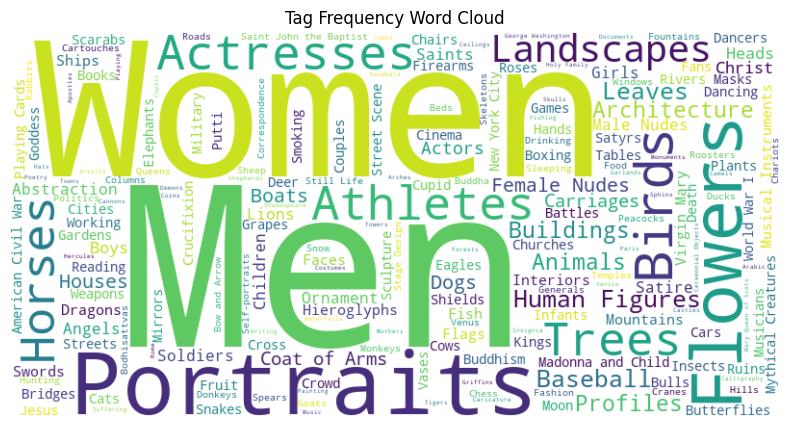

In [62]:
# Generate word cloud from counts of object tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(met_tags_unique))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of Object Tags')
plt.show()

## COUNT MISSING & UNKNOWN VALUES BY COLUMN

In [44]:
# Count Unknown Values by Column
met_cols = ['isHighlight', 'accessionNumber', 'accessionYear',
       'isPublicDomain', 'primaryImage', 'primaryImageSmall',
       'department', 'objectName', 'title',
       'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole',
       'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix',
       'artistAlphaSort', 'artistNationality', 'artistBeginDate',
       'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL',
       'objectDate', 'objectBeginDate', 'objectEndDate', 'medium',
       'dimensions', 'creditLine', 'geographyType', 'city',
       'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus',
       'excavation', 'river', 'classification', 'rightsAndReproduction',
       'linkResource', 'metadataDate', 'repository', 'objectURL',
       'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber']


# Create new nested list to count empty cells by column
unknowns_by_col = []

# Iterate over each item in met_cols Counter list
for c in met_cols:
    col_count = Counter(met_df[c]).most_common()
    unknowns = 0
    
    # Update 'unknown' with the # of empty cells in column, if > 0
    for cc in col_count:
        if cc[0] == "" or cc[0] == " " or cc[0] == "NAN":
            unknowns = cc[1]
    
    # Append column name and # of empty cells in it
    unknowns_by_col.append([c, unknowns])

In [45]:
# Sort (Desc.) Total Blank Values per Column

unknowns_by_col.sort(key=lambda x: x[1], reverse=True)

for key, value in unknowns_by_col:
    print(f"{key} - {value}")

linkResource - 482468
county - 481640
river - 480376
artistSuffix - 476488
locus - 475031
reign - 471236
artistGender - 469599
locale - 466816
excavation - 466090
state - 465716
subregion - 460543
rightsAndReproduction - 459284
dynasty - 459269
portfolio - 454770
city - 447854
region - 443441
GalleryNumber - 433171
artistPrefix - 424223
objectWikidata_URL - 413730
geographyType - 392083
period - 391421
country - 382219
culture - 317428
artistWikidata_URL - 282758
artistULAN_URL - 277885
artistDisplayBio - 248383
artistEndDate - 244729
artistBeginDate - 244486
primaryImage - 235179
primaryImageSmall - 235179
artistNationality - 234697
artistAlphaSort - 201521
artistRole - 201420
artistDisplayName - 201420
classification - 85076
dimensions - 74418
objectDate - 13377
medium - 7246
accessionYear - 3850
objectName - 2341
creditLine - 767
title - 284
isHighlight - 0
accessionNumber - 0
isPublicDomain - 0
department - 0
objectBeginDate - 0
objectEndDate - 0
metadataDate - 0
repository - 0
obj

### Graph: Unknown Values by Column

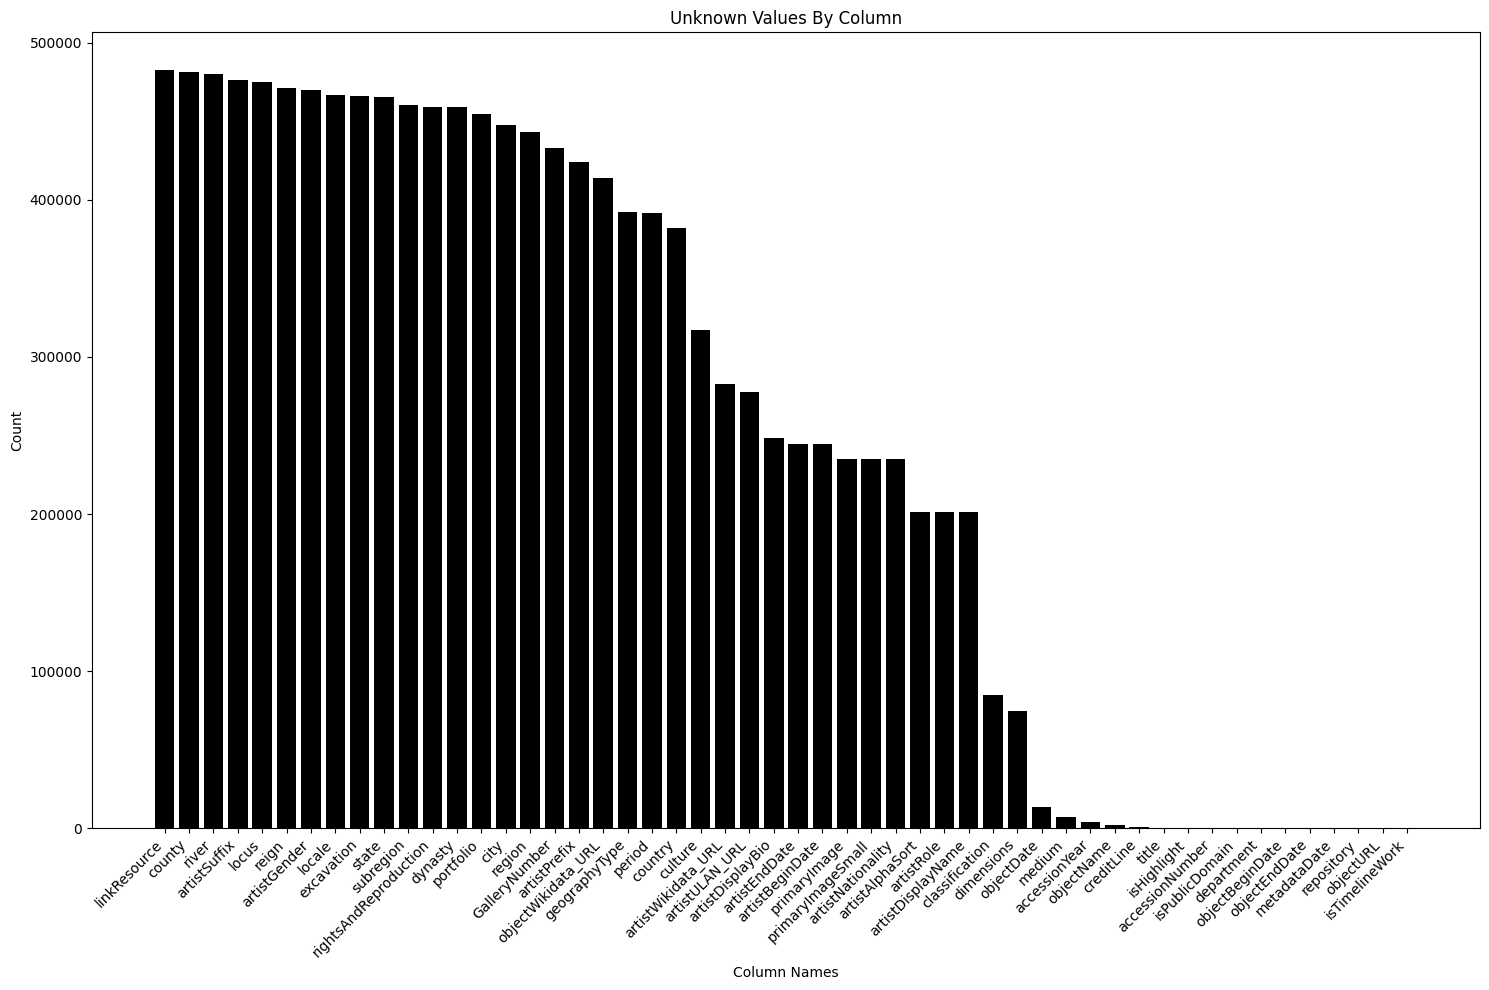

In [55]:
unknowns_plot = list(zip(*unknowns_by_col))
plt.figure(figsize=(15, 10))
plt.bar(unknowns_plot[0], unknowns_plot[1], color='black')
plt.xlabel('Column Names')
plt.ylabel('Count')
plt.title('Unknown Values By Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Standardized Country and Nationality Values

In [46]:
countries_df = pd.read_csv("../../data/standards/countries.csv")

In [47]:
countries_df["Country"] = countries_df["Country"].str.strip()
countries_df["Country"] = countries_df["Country"].str.lower()

countries_df["Nationality"] = countries_df["Nationality"].str.strip()
countries_df["Nationality"] = countries_df["Nationality"].str.lower()

countries_df["Region"] = countries_df["Region"].str.strip()
countries_df["Region"] = countries_df["Region"].str.lower()

In [48]:
# Get standard list of countries for comparison
countries_list = countries_df.loc[:, "Country"].tolist()
print(f"Number of Countries: {len(countries_list)}")
print()
for c in countries_list:
    print(c)

Number of Countries: 251

afghanistan
aland islands
albania
algeria
american samoa
andorra
angola
anguilla
antarctica
antigua and barbuda
argentina
armenia
aruba
australia
austria
azerbaijan
bahamas
bahrain
bangladesh
barbados
belarus
belgium
belize
benin
bermuda
bhutan
bolivia
bonaire, sint eustatius and saba
bosnia and herzegovina
botswana
bouvet island
brazil
british indian ocean territory
brunei
bulgaria
burkina faso
burundi
cabo verde
cambodia
cameroon
canada
cayman islands
central african republic
chad
chile
china
christmas island
cocos (keeling) islands
colombia
comoros
republic of the congo
democratic republic of the congo
cook islands
costa rica
ivory coast
croatia
cuba
curacao
cyprus
czech republic
denmark
djibouti
dominica
dominican republic
ecuador
egypt
el salvador
equatorial guinea
eritrea
estonia
eswatini
ethiopia
falkland islands
faroe islands
fiji
finland
france
french guiana
french polynesia
french southern territories
gabon
gambia
georgia
germany
ghana
gibraltar
gree

In [49]:
# Get standard list of nationalities for comparison
nationalities_list = countries_df.loc[:, "Nationality"].tolist()
print(f"Number of Nationalities: {len(nationalities_list)}")
print()
for n in nationalities_list:
    print(n)

Number of Nationalities: 251

afghan
alander
albanian
algerian
american samoan
andorran
angolan
anguillan
antarctic
antiguan
argentinian
armenian
aruban
australian
austrian
azerbaijani
bahamian
bahraini
bangladeshi
barbadian
belarusian
belgian
belizean
beninese
bermudan
bhutanese
bolivian
bonaire, sint eustatius and saba
bosnian and herzegovinan
botswanan
bouvet island
brazilian
british indian ocean territory
bruneian
bulgarian
burkinabe
burundian
cabo verde
cambodian
cameroonian
canadian
cayman
central african republic
chadian
chilean
chinese
christmas island
cocos (keeling) islands
colombian
comoran
congolese
congolese
cook islands
costa rican
ivorian
croatian
cuban
curacaoan
cypriot
czech
danish
djiboutian
dominican
dominican
ecuadorean
egyptian
salvadorean
equatorial guinean
eritrean
estonian
eswatinian
ethiopian
falklander
faroese
fijian
finnish
french
french guianan
french polynesian
french southern territories
gabonese
gambian
georgian
german
ghanaian
gibraltarian
greek
greenlan

In [50]:
# Get standard list of regions for comparison
regions_list = countries_df.loc[:, "Region"].unique().tolist()
print(f"Number of Regions: {len(regions_list)}")
print()
for r in regions_list:
    print(r)

Number of Regions: 6

asia
europe
africa
oceania
americas
nan
